In [1]:
import pandas as pd

In [2]:
df  = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape)
print("Unique value per column")
df.nunique()

(891, 12)
Unique value per column


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
print("Missing values per column")
df.isnull().sum()

Missing values per column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Distribution of the age column


Text(0, 0.5, 'Counts')

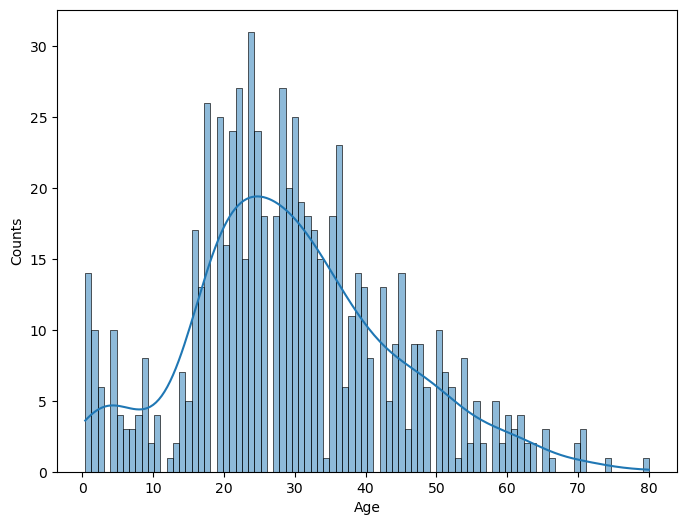

In [5]:
print("Distribution of the age column")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df["Age"], kde=True, bins=90)
plt.xlabel("Age")
plt.ylabel("Counts")

In [6]:
# from the hist we see its a right skewed dataset. So median for the missing is better option

 Distribution count of embarked data


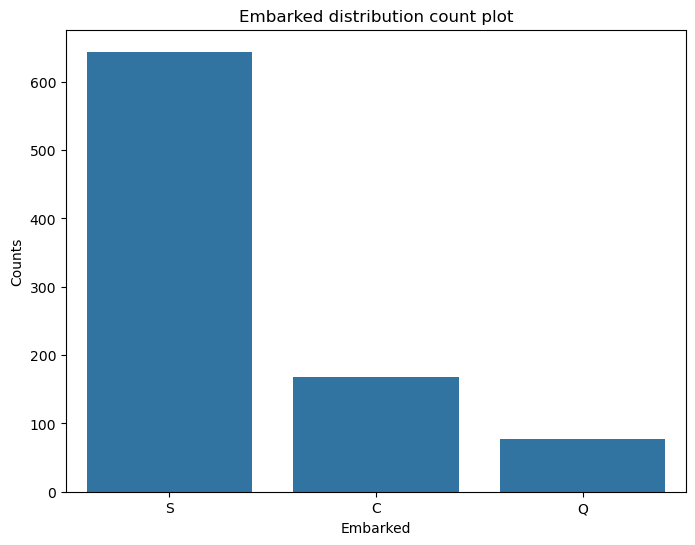

In [7]:
#as embarkde column has categorical data we will use count plot
print(" Distribution count of embarked data")
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Embarked")
plt.title("Embarked distribution count plot")
plt.xlabel('Embarked')
plt.ylabel("Counts")
plt.show()

In [8]:
# if there is any missing values in the embarked column we should use mod to fill it, cause almost 80% passengers are from S , so missing values should be replaced with S.

In [9]:
# hanlding missing values for age column 
age_median  = df["Age"].median()
df["Age"] = df["Age"].fillna(age_median)

# handling categorycal missing values of emabrked
emabarked_mode = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(emabarked_mode)

# drop cabin (too many missing values)
df = df.drop(columns=["Cabin"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# now checking null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('heart.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


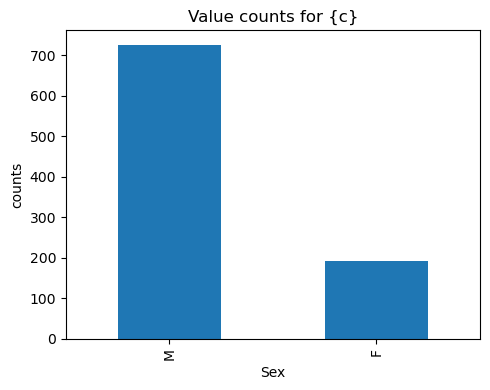

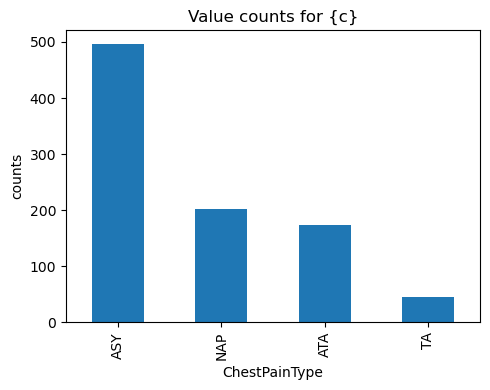

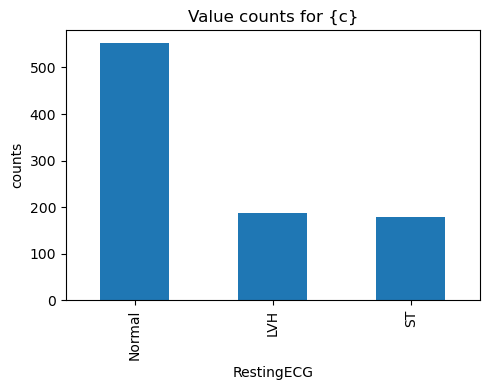

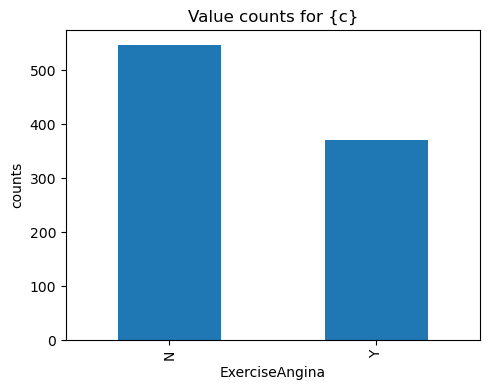

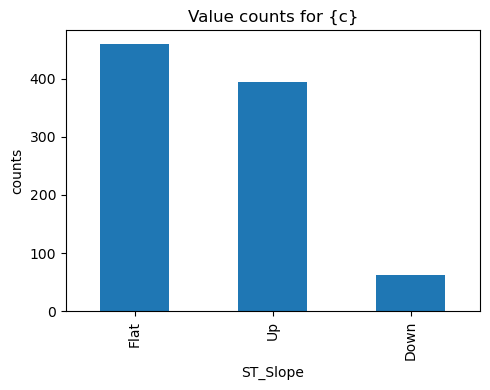

In [13]:
categorical_cols = ["Sex","ChestPainType","RestingECG","ExerciseAngina", "ST_Slope"]

for c in categorical_cols:
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind='bar')
    plt.title("Value counts for {c}")
    plt.ylabel("counts")
    plt.tight_layout()
    plt.show()

In [14]:
# label encoding for binary categorical columns SEX and EXERCISE_ANGINA

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])

df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,0.0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,0,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,1,1.5,Flat,1
9,48,0,ATA,120,284,0,Normal,120,0,0.0,Up,0


In [15]:
# one hot encoding for nominal categorical columns
n_cat_cols = ["ChestPainType","RestingECG", "ST_Slope"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)

df_encoded.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [16]:
# normalization and scaling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assume df_encoded is our working fataframe with target 'heart.csv'
target_col = "HeartDisease"
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)


# Standrard Scaling

scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train) # mean and SD will be calculated from X_train
X_test_std = scaler_sd.transform(X_test)

# convert scaled array back to dataframe for better visual
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns, index=X_train.index)
X_train_std_df.head()


# Min max scaling
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

# for visual 
X_test_mm_df = pd.DataFrame(X_test_mm, columns=X_test.columns, index=X_test.index)


In [18]:
X_test_mm_df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.700,0.323383,0.0,0.899225,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,0.725,0.859038,0.0,0.519380,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,0.800,0.000000,1.0,0.457364,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
535,0.562500,0.650,0.000000,0.0,0.457364,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
807,0.520833,0.540,0.512438,0.0,0.720930,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
